In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab09.ipynb")

# E7: Lab Assignment 09 - Taylor Series & Root Finding

You must submit the lab to Gradescope by the due date. You will submit the zip file produced by running the final cell of the assignment.

## Instructions

**Run the first cell, Initialize Otter**, to import the autograder and submission exporter.

Throughout the assignment, replace `...` with your answers. We use `...` as a placeholder and these should be deleted and replaced with your answers.

Any part listed as a "<font color='red'>**Question**</font>" should be answered to receive credit.

**Please save your work after every question!**

To read the documentation on a Python function, you can type `help()` and add the function name between parentheses.

## Score Breakdown
Question  | Points
:---      | --:
1.0 – 1.4 | 8
2         | 3
3.0 – 3.2 | 6
4         | 4
5.0 – 5.2 | 4
Total     | 25

**Run the cell below**, to import the required modules.

In [1]:
# Please run this cell, and do not modify the contents
import numpy as np
import math
import random
np.seterr(all='ignore');
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve
import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

## Question 1: Sine City

There is no direct way to calculate trigonometric functions, even on a computer. In order to find the solution to a given trigonometric function, computers instead use a high accuracy estimate. In this problem, you will implement your own trigonometric function using a Taylor series expansion. Computers actually use the CORDIC algorithm to implement trigonometric functions, logarithms and other floating-point arithmetic operations. You can find more about it [here](https://en.wikipedia.org/wiki/CORDIC) but it is not required for this assignment. 

### Question 1.0: Taylor series for sine

The Taylor series expansion about zero for sine (with input in radians) is

$$\sin(x) \approx x - \dfrac{x^3}{3!} + \dfrac{x^5}{5!} - \dfrac{x^7}{7!} + \dots + (-1)^{(n-1)}\dfrac{x^{(2n-1)}}{(2n-1)!}$$

or in summation notation

$$\sin(x) \approx \sum_{n=1}^N (-1)^{(n-1)}\frac{x^{(2n-1)}}{(2n-1)!}$$

For this problem, we will consider the $N^{th}$ Taylor expansion of sine to be the sum of the first $N$ terms of this series. So for example, if $N = 4$:

$$\sin(x) \approx \sum_{n=1}^4 (-1)^{(n-1)}\frac{x^{(2n-1)}}{(2n-1)!} = x - \dfrac{x^3}{3!} + \dfrac{x^5}{5!} - \dfrac{x^7}{7!}$$

The approximation above becomes exact as $N$ approaches infinity.

Write a function `mySin(X,N)` which computes sine at every radian value in `X` which is a `numpy.ndarray` of floats using the $N^{th}$ Taylor expansion for sine. The input `N` is a scalar integer greater than 0. The output should be the same type and size as `X`.

Test your new `mySin(X,N)` function for the examples below and make sure it produces the correct output. Assign the result to `q1_0`.


```PYTHON
Examples: 

>>> mySin(np.array([np.pi/2]),5) 
array([1.00000354])

>>> mySin(np.linspace(0,np.pi,3),7)
array([0.00000000e+00, 1.00000000e+00, 2.11425676e-05])

>>> mySin(np.linspace(0,5*np.pi,6),10)
array([ 0.00000000e+00, -5.28919613e-10, -1.04818280e-03, -4.78057566e+00,
       -1.78979741e+03, -1.69520866e+05])

>>> mySin(np.array([[np.pi/6, np.pi/4],[np.pi/3, np.pi/2]]),10)
array([[0.5       , 0.70710678],
       [0.8660254 , 1.        ]])
```

In [2]:
# ANSWER CELL
# BEGIN SOLUTION
def mySin(X,N):
    """
    Computes the Nth Taylor expansion of sine for inputs in X
    X: numpy array (float), radians
    N: Nth degree of a sine Taylor Series expansion
    Output: Double same size as X
    """
    sinSeries = np.zeros_like(X)
    for i in range(1, N+1):
        sinSeries = sinSeries + ((-1)**(i-1)*(np.power(X,(2*i-1))))/math.factorial(2*i-1)
        
    return sinSeries
# END SOLUTION

In [3]:
# TEST YOUR FUNCTION HERE
q1_0 = mySin(np.array([np.pi/2]),5)  # SOLUTION

print(f'Taylor approximation: {q1_0}')

Taylor approximation: [1.00000354]


In [ ]:
grader.check("q1.0")

### Question 1.1: Error of Taylor series

For a finite number of terms, the error of the Taylor series estimate for sine (expanded about the origin) increases away from the origin. Since NumPy has their own implementation of the sine function, `np.sin()`, we can compute the error between your approximation for sine and the `np.sin()` function. 

However, and in general, the error is often approximated based on the next term of the Taylor series, since that term is the largest that is being neglected. For example, if the Taylor series for sine is truncated to $N=2$, the error will be on the order of $x^5/5!$, which is the $N+1=3^{rd}$ term of the Taylor series.

Define a function named `mySinError(X,N)` which returns two values: (1) the absolute difference between `np.sin()` and your function `mySin()` for all values in `X`, and (2), the absolute value of the $(N+1)^{th}$ term of the Taylor expansion for all values in `X`. Your function should return the error and next term (in this order), both of which should be the same size as `X`

Test your function for the examples below. Assign the result to `q1_1`. Feel free to experiment with other inputs.

```PYTHON
Examples:
    
>>> mySinError(np.array([2*np.pi]),8)
(array([0.09324576]), array([0.10422916]))

>>> mySinError(np.linspace(-np.pi, np.pi, 4),2)
(array([2.02612013, 0.01022462, 0.01022462, 2.02612013]),
 array([2.55016404, 0.0104945 , 0.0104945 , 2.55016404]))
```

In [7]:
# ANSWER CELL
# BEGIN SOLUTION
def mySinError(X,N):
    """
    Finds the error in the Nth Taylor approximation for sine, along with
    absolute value of the (N+1)th term of the Taylor expansion
    """
    error = np.abs(mySin(X, N) - np.sin(X))
    next_term = np.abs((-1)**N*np.power(X,2*N+1)/math.factorial(2*N+1))
    return error, next_term
# END SOLUTION

In [8]:
# TEST YOUR FUNCTION HERE
q1_1 = mySinError(np.linspace(-np.pi,np.pi, 4),2) # SOLUTION

print(f'Error using np.sin():  {q1_1[0]}')
print(f'Error using next term: {q1_1[1]}')

Error using np.sin():  [2.02612013 0.01022462 0.01022462 2.02612013]
Error using next term: [2.55016404 0.0104945  0.0104945  2.55016404]


In [ ]:
grader.check("q1.1")

### Question 1.2: Error plot of Taylor series

Let us now plot the error and the next term in the Taylor series so that we can compare them visually.

Define a function named `PlotError(X,N)` which returns a `matplotlib.pyplot` figure of the absolute error in the $N^{th}$ Taylor approximation for sine and the absolute value of the $(N+1)^{th}$ term of the Taylor expansion for all values in `X` as computed in the previous part.

The function should create the figure as follows:
* Line plot (1) `X` vs. absolute difference between `np.sin()` and your function `mySin()` for all values in `X`
* Line plot (2) `X` vs. absolute value of the $(N+1)^{th}$ term of the Taylor expansion for all values in `X` 
* A legend with labels 'Error' and 'Next term' for line plots 1 and 2, respectively
* X axis label which reads 'X'
* Y axis label which reads 'Absolute value'
* X axis limits based on the minimum and maximum values in `X`
* Title label which reads 'N = {N} Taylor expansion of sine', where {N} is replaced with `N`

Test your function for `N = 2` and `X = np.linspace(-N*np.pi/2., N*np.pi/2.)`. Assign the result to `q1_2`. Your output figure should look like Figure 1 shown below. Feel free to experiment with other inputs as well as any plotting options that are not explicitly specified.

<center><img src="resources/taylor.png" style="width: 500px;"/>
<figcaption style="text-align:center"> Figure 1. Error and next term of N = 2 sine Taylor expansion. </figcaption></center> 

In [12]:
# ANSWER CELL

# Do not modify this line
import matplotlib.pyplot as plt

def PlotError(X,N):
    """
    Plots the absolute error in the Nth Taylor approximation for sine
    and the absolute value of the (N+1)th term of the Taylor expansion
    """
    error, next_term = mySinError(X, N) # SOLUTION
    
    # Create figure
    fig = plt.figure(figsize=(6,4)) # SOLUTION
    # Plot error
    plt.plot(X,error,label='Error') # SOLUTION 
    # Plot next term
    plt.plot(X,next_term,label='Next term') # SOLUTION 
    # Axis limits
    plt.xlim([np.min(X),np.max(X)]) # SOLUTION 
    # Title and labels
    plt.xlabel('X') # SOLUTION
    plt.ylabel('Absolute value') # SOLUTION
    plt.title(f'N = {N} Taylor expansion of sine') # SOLUTION
    plt.grid() # SOLUTION 
    # Legend
    plt.legend() # SOLUTION
    return fig

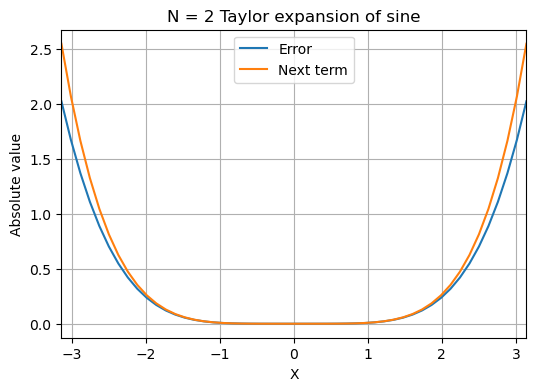

In [13]:
# TEST YOUR FUNCTION HERE
N = 2 # SOLUTION NO PROMPT
X = np.linspace(-N*np.pi/2., N*np.pi/2.) # SOLUTION NO PROMPT
q1_2 = PlotError(X,N) # SOLUTION

In [ ]:
grader.check("q1.2")

### Question 1.3: Using the periodicity of sine

The previous question demonstrates that, far enough from the origin, a finite Taylor expansion diverges from the actual solution for sine. One way to improve the accuracy far from the origin is to utilize the periodicity of the sine function. For example, $\sin(1 + 2\pi) = \sin(1)$, and $1$ is closer to the origin than $1 + 2\pi$. This allows us to calculate $\sin(1 + 2\pi)$ more accurately by simply setting it equal to $\sin(1)$ .

In general, the periodicity of the sine function implies that $\sin(x \pm 2\pi) = \sin(x)$ for all $x$.

Write a function `mySinPeriodic(X,N)` which converts every radian value in `X` to the range $[-\pi, \pi)$ using the periodicity of sine and then returns the $N^{th}$ Taylor expansion for sine using the converted values as an input. The output should be the same type and size as the input `X`.

`X` is a `np.ndarray` of floats. The input `N` is a scalar integer greater than 0.

Test your `mySinPeriodic(X,N)` function for the examples below. Assign the output to `q1_3`. Feel free to try it for other inputs.

*Hint*: Be careful if you wish to use the Python operator `%`. Applying `X % (2*np.pi)` will map the values to the range $[0, 2\pi)$. You'll then have to shift values in the range $[\pi, 2\pi)$ to the range $[-\pi, 0)$. 
For example:
* $\sin(2.5\pi) = \sin(2.5\pi\,\%\,2\pi) = \sin(0.5\pi)$

* $\sin(-2.5\pi) = \sin(-2.5\pi\,\%\,2\pi) = \sin(1.5\pi) = \sin(1.5\pi -2\pi) = \sin(-0.5\pi)$

So, after running `X % (2*np.pi)`, resulting values that are $<\pi$ should not be modified and are correct, but resulting values that are $\geq\pi$ should be modified by $-2\pi$.

```PYTHON
Examples:

>>> mySin(np.array([1]),10) # original
array([0.84147098])

>>> mySinPeriodic(np.array([1]),10)  # periodic
array([0.84147098])

>>> mySin(np.array([1+20*np.pi]),10)  # original
array([-1.49644192e+17])

>>> mySinPeriodic(np.array([1+20*np.pi]),10) # periodic
array([0.84147098])

>>> mySin(np.linspace(0,5*np.pi,6),10) # original
array([0.00000000e+00, -5.28919613e-10, -1.04818280e-03, -4.78057566e+00, -1.78979741e+03, -1.69520866e+05])

>>> mySinPeriodic(np.linspace(0,5*np.pi,6),10) # periodic
array([0.0000000e+00, 5.2891828e-10, 0.0000000e+00, 5.2891828e-10, 0.0000000e+00, 5.2891828e-10])
```

In [20]:
# ANSWER CELL
# BEGIN SOLUTION
def mySinPeriodic(X,N):
    """
    Converts every radian value in X to the range [-pi,pi) using
    the periodicity of sine and then calculates sine at each point using the
    Nth Taylor expansion for sine
    """
    X = X % (2*np.pi) 
    X[X>=np.pi] = X[X>=np.pi] - 2*np.pi
            
    return mySin(X, N)
# END SOLUTION

In [21]:
# TEST YOUR FUNCTION HERE
q1_3 = mySinPeriodic(np.array([1+20*np.pi]),10) # SOLUTION

print(f'Taylor approximation: {q1_3}')

Taylor approximation: [0.84147098]


In [ ]:
grader.check("q1.3")

### Question 1.4: Accurate range of the Taylor series

Now, we will examine how well our new and improved approximation for sine work by finding the range of values for which their accuracy is acceptable. Recall that the error is often approximated based on the next term of the Taylor series, the $(N+1)^{th}$ term. Let's refer to this term as $E_{N}$.

Our goal is to find the range of angles for which the absolute value of the next term is less than or equal to some tolerance value: $|E_{N}| \leq tol$

Write a function `mySinRange(N,tol)` that finds the range of angles for which $|E_{N}| \leq tol$. The range should be returned as a 2-element list containing the minimum and maximum angle in radians for which the sine of every angle in between can be found within the given tolerance. 

*Hints:*
* Rewrite this problem as a root solving problem. How can you convert $|E_{N}| \leq tol$ to a root finding problem?
* Write a Python function that returns the values of the function for which you are trying to obtain its roots.
* Use `scipy.optimize.fsolve()` to find the roots of the function you defined in the previous step.  Refer to the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html). The two main arguments will be the function you defined in the previous step and some initial guess for the root, `x0`.
* Evaluate the output from `scipy.optimize.fsolve()`. Use the fact that the error will be symmetric about the origin (refer to your plots above). If `scipy.optimize.fsolve()` returns an angle `a` as the root, the range over which the approximation is accurate would be `[-|a|, |a|]`.
* Consider the periodicity of sine. This implies that if your Taylor approximation is within the tolerance for angles within $[-\pi, \pi)$, then it is accurate for all angles if we modify them based on the periodicity of sine. In this case, your function should return the list $[-\infty, \infty]$ (recall the built-in `np.inf`).

Test your `mySinRange(N, tol)` function for the examples below. Assign the output to `q1_4`. Feel free to try it for other inputs.

```PYTHON
    Examples:

    >>> mySinRange(5,0.1)
    [-inf, inf]
    
    >>> mySinRange(5,0.001)
    [-2.6199130820816245, 2.6199130820816245]
    
    >>> mySinRange(5,1e-8) 
    [-0.9199017158167089, 0.9199017158167089]
```

In [25]:
# ANSWER CELL
# BEGIN SOLUTION
def mySinRange(N,tol):
    """
    Finds the range of angles for which the error in the Nth taylor expansion is 
    less than the given tolerance, tol.
    Outputs 2-element list containing minimum and maximum angle in radians for which 
    every angle in between can be found within the given tolerance
    """
    f = lambda x: tol - np.abs(np.power(-1,N)*np.power(x,(2*N+1))/math.factorial(2*N+1))
    angle = scipy.optimize.fsolve(f, x0=np.pi)
    ang_range = [-abs(angle[0]), abs(angle[0])]
    
    if abs(angle[0]) >= math.pi:
        ang_range = [-np.inf, np.inf]
        
    return ang_range
# END SOLUTION

In [26]:
# TEST YOUR FUNCTION HERE
q1_4 = mySinRange(5,1e-8) # SOLUTION

print(f'Accurate range: {q1_4} radians')

Accurate range: [np.float64(-0.9199017158167089), np.float64(0.9199017158167089)] radians


In [ ]:
grader.check("q1.4")

## Quesion 2: $n^{th}$ root

An $n^{th}$ root $r$ of a number $x$ satisfies the equation $$r = \sqrt[n]{x}$$ which can also be stated as $$r^n = x$$

We'll only consider real roots for this problem. Create a function named `nth_root(x,n,a,b,maxiter,tol)` which outputs an approximation of $r$, an $n^{th}$ root of x. This approximation should be computed using the bisection method to find the root of the function $f(r)=r^n−x$. The function inputs should be:
* `x`, a strictly positive float for which you want an approximate $n^{th}$ root
* `n`, a strictly positive integer specifying the root degree
* `a` and `b` are floats such that `a < b`
* `maxiter`, a strictly positive integer specifying the maximum number of iterations allowed for the bisection method
* `tol`, a strictly positive float specifying the tolerance for the bisection method

You may assume that $sign(f(a)) \neq sign(f(b))$ for the first guess. 

Set default argument values `maxiter=100` and `tol=1e-16`. Your function should return once the error metric $|f(r)|$ is less than or equal to the tolerance `tol` **or** the bisection method has exceeded `maxiter` iterations. 
Once you are done, try out your new `my_nth_root(x,n,a,b,maxiter,tol)` function for the examples below in the following cell. Assign the output to `q2`. Feel free to try it for other inputs. Note that you should implement this function using iteration and not recursion.


```PYTHON
Examples:

>>> nth_root(27,3,0,10)
3.0

>>> nth_root(27,3,0,10,maxiter=10)
2.998046875

>>> nth_root(27,3,0,10,tol=1e-3)
3.000030517578125

>>> nth_root(256,4,0,5)
4.0

>>> nth_root(256,4,-5,0)
-4.0
```

In [30]:
# ANSWER CELL
# BEGIN SOLUTION
def nth_root(x,n,a,b,maxiter=100,tol=1e-16):
    """
    Computes the n-th root of x using the bisection
    method with initial interval (a,b) 
    """
    f = lambda y: y**n - x
    for i in range(maxiter):
        m = (a+b)/2.
        if np.abs(f(m)) <= tol:
            break
        elif np.sign(f(m)) == np.sign(f(a)):
            a = m
        else:
            b = m  
    return m
# END SOLUTION

In [31]:
# TEST YOUR FUNCTION HERE
q2 = nth_root(256,4,-5,0)  # SOLUTION

print(f'nth root: {q2}')

nth root: -4.0


In [ ]:
grader.check("q2")

## Question 3: Rooting for you

Let us now generalize the implementation of the bisection method to any function as well as compare its performance to the Newton-Raphson method.

### Question 3.0: Bisection Method

Write a function named `myBisection(f,a,b,maxiter,tol)` where:
* `f` is a function object
* `a` and `b` are floats such that `a < b`
* `maxiter` is a strictly positive integer specifying the maximum number of iterations allowed
* `tol` is a strictly positive float specifying the tolerance

Set default argument values `maxiter=100` and `tol=1e-16`. The function should return a list `R` containing the root approximations, i.e. `R[k]` is the estimate of the root of `f` after $k$ iterations of the bisection method.

The function should also return the absolute error in a list `E` where, similarly, `E[k]` is the value of $\lvert f(R[k]) \rvert$ at iteration $k$. 

The function should terminate when $\lvert f(R[k]) \rvert \leq$ `tol` or after `maxiter` iterations have been performed. If $N$ iterations of the bisection method have been performed, the two output lists should each have $N +1$ elements. You may assume that $sign(f(a)) \neq sign(f(b))$ for the first guess. 

The funciton should return `R` and `E` in this order.

**Note**: The inputs `a` and `b` constitute the first iteration of bisection, and therefore `R` and `E`
should never be empty. 

Yest your new `myBisection(f,a,b,maxiter,tol)` function for the examples below. Assign the output to `q3_0`. Feel free to try it for other inputs.

```PYTHON
Examples:
    
>>> f = lambda x: x**2 - 2
>>> myBisection(f,0,2,tol=1e-1)
([1.0, 1.5, 1.25, 1.375, 1.4375], [1.0, 0.25, 0.4375, 0.109375, 0.06640625])

>>> f = lambda x: math.sin(x) - math.cos(x)
>>> myBisection(f,0,2,tol=1e-2)
([1.0, 0.5, 0.75, 0.875, 0.8125, 0.78125], 
 [0.30116867893975674, 0.39815702328616975, 0.050050108850486774, 0.12654664407270189, 0.038323093040207756, 0.005866372111545948])

>>> f = lambda x: math.exp(-x) - x**2
>>> myBisection(f,0,1,tol=1e-2)
([0.5, 0.75, 0.625, 0.6875, 0.71875, 0.703125], [0.3565306597126334, 0.09013344725898531, 0.14463642851899028, 0.030175327970940913, 0.029240485786380888, 0.0006511313011985931])    
```

In [37]:
# ANSWER CELL
# BEGIN SOLUTION
def myBisection(f,a,b,maxiter=100,tol=1e-16):
    m = (a+b)/2
    R = [m]
    E = [np.abs(f(m))]
    for _ in range(maxiter):
        if E[-1] <= tol:
            break
        elif np.sign(f(m)) == np.sign(f(a)):
            a = m
        else:
            b = m
        m = (a+b)/2    
        R.append(m)
        E.append(np.abs(f(m)))       
    return R, E
# END SOLUTION

In [38]:
# TEST YOUR FUNCTION HERE
f = lambda x: x**2 - 2 # SOLUTION NO PROMPT
q3_0 = myBisection(f,0,2,tol=1e-1) # SOLUTION

print(f'Root approximations: {q3_0[0]}')
print(f'Absolute error:      {q3_0[1]}')

Root approximations: [1.0, 1.5, 1.25, 1.375, 1.4375]
Absolute error:      [np.float64(1.0), np.float64(0.25), np.float64(0.4375), np.float64(0.109375), np.float64(0.06640625)]


In [ ]:
grader.check("q3.0")

<div class="alert alert-block alert-warning"> <b>NOTE!</b> The rest of the lab focuses on another root finding method, Newton Raphson. If we haven't covered this topic yet and you have no prior experience with it, please wait until after the next lecture to continue the assignment. </div>

### Question 3.1: Newton's Method

Define a function `myNewton(f,df,x0,maxiter,tol)` where:
* `f` is a function object representing the function $f(x)$
* `df` is a function object representing the derivative of $f$
* `x0` is an initial estimate of the root (float)
* `maxiter` is a strictly positive integer specifying the maximum number of iterations allowed
* `tol` is a strictly positive float specifying the tolerance.

Set default argument values `maxiter=100` and `tol=1e-16`. The function should return a list `R` containing the root approximations, i.e. `R[0]` is the initial estimate `x0`, and `R[k]` is the estimate of the root of `f` after $k$ iterations of the Newton-Raphson method.

The function should also return the absolute error in a list `E` where, similarly, `E[k]` is the value of $\lvert f(R[k]) \rvert$ at iteration $k$. 

The function should terminate when $\lvert f(R[k]) \rvert \leq$ `tol` or after `maxiter` iterations have been performed. If $N$ iterations of Newton's method have been performed, the two output lists should each have $N +1$ elements. You may assume that the derivative of `f` will not be 0 during any iteration for any of the test cases given. 

The funciton should return `R` and `E` in this order.

Test your new `myNewton(f,df,x0,maxiter,tol)` function for the examples below. Assign the output to `q3_1`. Feel free to try it for other inputs.

```PYTHON
Examples:

>>> f = lambda x: x**2 - 2
>>> df = lambda x: 2*x
>>> myNewton(f,df,1,tol=1e-5)
([1, 1.5, 1.4166666666666667, 1.4142156862745099], [1, 0.25, 0.006944444444444642, 6.007304882871267e-06])

>>> f = lambda x: math.sin(x) - math.cos(x)
>>> df = lambda x: math.cos(x) + math.sin(x)
>>> myNewton(f,df,1,tol=1e-5)
([1, 0.782041901539138, 0.7853981759997019], [0.30116867893975674, 0.004746462127804163, 1.7822277875723103e-08])

>>> f = lambda x: math.sinh(x) - 1
>>> df = lambda x: math.cosh(x)
>>> myNewton(f,df,-1,tol=1e-8)
([-1, 0.4096484296196503, 0.9430603553462776, 0.8827364259018153, 0.8813742438952269, 0.8813735870196955], [2.1752011936438014, 0.578797742601695, 0.08919683435847481, 0.001928274492311477, 9.28962716750803e-07, 2.156053113822054e-13])
```

In [44]:
# ANSWER CELL
# BEGIN SOLUTION
def myNewton(f,df,x0,maxiter=100,tol=1e-16):
    R = [x0]
    E = [np.abs(f(x0))]
    for _ in range(maxiter):
        if E[-1] <= tol:
            break
        x0 = x0 - f(x0)/df(x0)
        R.append(x0)
        E.append(abs(f(x0)))
    return R, E
# END SOLUTION

In [45]:
# TEST YOUR FUNCTION HERE
f = lambda x: math.sinh(x) - 1 # SOLUTION NO PROMPT
df = lambda x: math.cosh(x) # SOLUTION NO PROMPT
q3_1 = myNewton(f,df,-1,tol=1e-5) # SOLUTION

print(f'Root approximations: {q3_1[0]}')
print(f'Absolute error:      {q3_1[1]}')

Root approximations: [-1, 0.4096484296196503, 0.9430603553462776, 0.8827364259018153, 0.8813742438952269]
Absolute error:      [np.float64(2.1752011936438014), 0.578797742601695, 0.08919683435847481, 0.001928274492311477, 9.289627165287584e-07]


In [ ]:
grader.check("q3.1")

### 3.2: Further Exploration (Optional)

In Questions 3.0 and 3.1, you explored two iterative root finding methods. Each of these functions provides a series of $x$ values as the algorithm "narrows down" the root. Experiment with different types of functions as well as different initial intervals or estimates, and see how the different root finding methods behave. Do they always converge? How quickly do they converge?

To get started, consider the following function:

```PYTHON
f = lambda x: x**3 - 3*x - 5
df = lambda x: 3*x**2 - 3
```

Plot the error for the two methods against the number of iterations. You should see "linear convergence" for one method and "quadratic convergence" for the other (quadratic meaning that the number of correct decimal places approximately doubles with each iteration). You may want to use a log plot to see this result. 

This section will not be graded, but completing it and thinking about the concepts will help improve your understanding of root finding. 

Some other interesting questions to consider:
* Find a function $f(x)$ and guess for the root, $x_0$, such that the Newton-Raphson method oscillates between $x_0$ and $−x_0$ indefinitely.
* Why does the bisection method fail on $f(x) = 1/x$? 

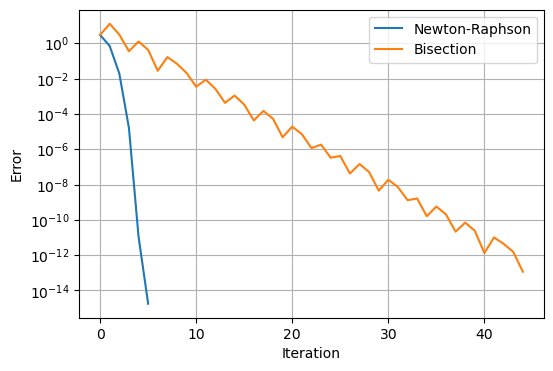

In [51]:
# ANSWER CELL
# BEGIN SOLUTION
f = lambda x: x*x*x - 3*x - 5
df = lambda x: 3*x*x - 3
R_n,E_n = myNewton(f,df,2,tol=1e-12)
R_b,E_b = myBisection(f,0,4,tol=1e-12)

# Plot
plt.figure(figsize=(6,4))
plt.semilogy(E_n,label = 'Newton-Raphson')
plt.semilogy(E_b,label = 'Bisection')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.grid()
plt.legend();
# END SOLUTION

In [52]:
plt.close("all")

## Question 4: Bumpy Road

The spring shock system in automobiles is an example of a real mechanical system which exhibits damped oscillation over time (see response in Figure 2). The resistance force of the spring $F$ (N), with respect to time $t$ (s), can be modeled with the following equation

\begin{equation*}
F(t) = k_1  \exp{\left(-\frac{t}{k_2\pi}\right)}\cos{(\pi t)} 
\end{equation*}

where $k_1$ and $k_2$ are known spring constants (N/s).

<br>
<center><figure>
    <table><tr>
    <td style="vertical-align:center"> 
      <p align="center" >
        <img src="https://cdn.dribbble.com/users/825103/screenshots/3414038/parkers.co.uk.gif" style="width: 575px;">
        <br>
      </p> 
    </td>
    <td style="vertical-align:center"> 
      <p align="center" >
        <img src="resources/spring.png" style="width:100%">
        <br>
      </p> 
    </td>
    </tr></table>
    <figcaption style="text-align:center">Figure 2. Damping effect with spring constants $k_1 = 1000$ N/s and $k_2 = 0.6$</figcaption>  
</figure></center>


We will use the above equation to describe the force on a car's shock system following a speed bump encountered at $t = 0$ seconds. We want to find a time instance near $t = 5$ seconds when the resistance force $F$ is equal to zero. In order to do that, we need to find the root values of $F(t)$.

Write a function named `damping_root(k1,k2,t0,method)` where the inputs are:
* `k1, k2`: the spring constants defined above.
* `t0`: the time instance of interest around which we want to find a root value.
* `method`: a string specifying the root finding method 

The function should return the root of $F(t)$ as determined by the specified method. If `method` is specified as `'newton'`, use your `myNewton` function to solve the problem with the initial estimate `t0` along with `maxiter=100` and `tol=1e-8`. If `method` is specified as `'fsolve'`, use the built-in `scipy.optimize.fsolve` function. Use the initial estimate `t0` along with the default parameters. Refer to the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

If `method` is neither `'newton'` nor `'fsolve'`, then return the error message 'Invalid method.'

Test your `damping_root(k1,k2,t0,method)` function for the examples below. Assign the output to `q4`. Feel free to try it for other inputs.

```PYTHON
Examples:

>>> k1,k2,t0 = 1000,0.6,5.1
>>> damping_root(k1,k2,t0,method='newton')
5.49999999999843  

>>> k1,k2,t0 = 1000,0.6,5.1
>>> damping_root(k1,k2,t0,method='fsolve')
5.500000000000001

>>> k1,k2,t0 = 1000,0.6,4.9
>>> damping_root(k1,k2,t0,method='newton')
1.499999999999827

>>> k1,k2,t0 = 1000,0.6,4.9
>>> damping_root(k1,k2,t0,method='fsolve')
5.500000000000022

>>> k1,k2,t0 = 1000,0.6 4.9
>>> damping_root(k1,k2,t0,method='bisection')
'Invalid method.'
```

In [53]:
# ANSWER CELL
# BEGIN SOLUTION
def damping_root(k1,k2,t0,method):
    if method == 'newton':
        f = lambda t: k1*np.exp(-t/np.pi/k2)*np.cos(np.pi*t)
        df = lambda t: k1*np.exp(-t/np.pi/k2)*np.cos(np.pi*t)*(-1/np.pi/k2) - k1*np.exp(-t/np.pi/k2)*np.sin(np.pi*t)*np.pi
        R,E = myNewton(f,df,t0,maxiter=100,tol=1e-8)
        x = R[-1]
    elif method == 'fsolve':
        f = lambda t: k1*np.exp(-t/np.pi/k2)*np.cos(np.pi*t)
        x = scipy.optimize.fsolve(f,t0)[0]
    else:
        x ='Invalid method.'
    return x
# END SOLUTION

In [54]:
# TEST YOUR FUNCTION HERE
k1,k2,t0 = 1000,0.6,4.9  # SOLUTION NO PROMPT
q4 = damping_root(k1,k2,t0,method='fsolve') # SOLUTION

print(f'Force = 0 at t = {q4} sec')

Force = 0 at t = 5.500000000000022 sec


In [ ]:
grader.check("q4")

## Question 5: Pipe dream

Consider the problem of building a pipeline from an offshore oil platform, a distance $H$ miles from the shoreline, to an oil refinery station on land, a distance $L$ miles along the shore. The cost of building the pipe is $C_{ocean}$ per mile while the pipe is under the ocean and $C_{land}$ per mile while the pipe is on land. The pipe will be built in a straight line toward the shore where it will make contact at some point, $x$, between $0$ and $L$. It will continue along the shore on land until it reaches the oil refinery. See Figure 3 for clarification.

<center><img src="resources/oil_platform.png" style="width: 400px;"/>
<figcaption style="text-align:center"> Figure 3. Pipeline geometry. </figcaption><center>

Our goal is to determine the x-value which minimizes the total cost of the pipeline.

### Question 5.0
We'll start by formulating the total cost function.
Write a function `my_pipe_cost(x,C_ocean,C_land,L,H)` where the input arguments are as described above and the output is the total cost of the the pipeline. 

Test your `pipe_cost(x,C_ocean,C_land,L,H)` function for the example below. Assign the output to `q5_0`. Feel free to try it for other inputs.


```PYTHON
Examples:
>>>  x, C_ocean, C_land, L, H = 20, 20, 10, 100, 50
>>>  pipe_cost(x,C_ocean,C_land,L,H)
1877.0329614269008
```

In [61]:
# ANSWER CELL
# BEGIN SOLUTION
pipe_cost = lambda x,C_ocean,C_land,L,H: C_ocean*np.sqrt(H**2+x**2) + C_land*(L-x)
# END SOLUTION

In [62]:
# TEST YOUR FUNCTION HERE
x,C_ocean,C_land,L,H = 20,20,10,100,50 # SOLUTION NO PROMPT
q5_0 = pipe_cost(x,C_ocean,C_land,L,H) # SOLUTION

print(f'Total cost = ${q5_0}')

Total cost = $1877.0329614269008


In [ ]:
grader.check("q5.0")

### Question 5.1

Next, we need to compute the derivative of the cost function with respect to x. Write a function `pipe_cost_derivative(x,C_ocean,C_land,L,H)` where the input arguments are as described above and the output is the derivative of the cost function evaluated at x. 

Test your new `pipe_cost_derivative(x,C_ocean,C_land,L,H)` function for the example below. Assign the output to `q5_1`. Feel free to try it for other inputs.


```PYTHON
Examples:
>>>  x, C_ocean, C_land, L, H = 20, 20, 10, 100, 50
>>>  pipe_cost_derivative(x,C_ocean,C_land,L,H)
-2.5721864729179256
```

In [68]:
# ANSWER CELL
# BEGIN SOLUTION
pipe_cost_derivative = lambda x,C_ocean,C_land,L,H: C_ocean/np.sqrt(H**2+x**2)*x-C_land
# END SOLUTION

In [69]:
# TEST YOUR FUNCTION HERE
x,C_ocean,C_land,L,H = 20,20,10,100,50 # SOLUTION NO PROMPT
q5_1 = pipe_cost_derivative(x,C_ocean,C_land,L,H) # SOLUTION

print(f'Derivative = {q5_1} $/mile')

Derivative = -2.5721864729179256 $/mile


In [ ]:
grader.check("q5.1")

## Question 5.2

Finally, we'll set the derivative to zero and find the root of the equation which minimizes the cost using the bisection method. 
 
Write a function `pipe_builder(C_ocean,C_land,L,H)` where the input arguments are as described above and the output is the x-value that minimizes the cost as well as the total cost itself for this x-value. You should use your `myBisection` function to determine this value to within a tolerance of $10^{-6}$ and a maximum of 100 iterations starting at the initial bound $a=0$ and $b=L$.

Test your new `pipe_builder(C_ocean,C_land,L,H)` function for the examples below. Assign the output to `q5_2`. Feel free to try it for other inputs.

Do not use any built-in optimization or root-finding functions.

```PYTHON
Examples:
>>> C_ocean,C_land,L,H = 20,10,100,50
>>> pipe_builder(C_ocean,C_land,L,H )
(28.867512941360474, 1866.0254037844386)

>>> C_ocean,C_land,L,H = 30,10,100,50
>>> pipe_builder(C_ocean,C_land,L,H)
(17.67767071723938, 2414.2135623730956)

>>> C_ocean,C_land,L,H = 30,10,100,20
>>> pipe_builder(C_ocean,C_land,L,H)
(7.07106739282608, 1565.685424949238)
```

In [75]:
# ANSWER CELL
# BEGIN SOLUTION
def pipe_builder(C_ocean,C_land,L,H):
    # Derivative of the cost function
    dcost = lambda x:  pipe_cost_derivative(x,C_ocean,C_land,L,H)
    # Bisection method
    R,E = myBisection(dcost,0,L,maxiter=100,tol=1e-6)
    # Return solution for x
    x = R[-1]
    return x, pipe_cost(x,C_ocean,C_land,L,H)

# END SOLUTION

In [76]:
# TEST YOUR FUNCTION HERE
C_ocean,C_land,L,H = 20,10,100,50 # SOLUTION NO PROMPT
q5_2 = pipe_builder(C_ocean,C_land,L,H) # SOLUTION

print(f'Optimal x-value =  {q5_2[0]} miles')
print(f'Optimal cost    = ${q5_2[1]}')

Optimal x-value =  28.867512941360474 miles
Optimal cost    = $1866.0254037844386


In [ ]:
grader.check("q5.2")

### You're done with this Lab!

**Important submission information:** After completing the assignment, click on the Save icon from the Tool Bar &nbsp;<i class="fa fa-save" style="font-size:16px;"></i>&nbsp;. After saving your notebook, **run the cell with** `grader.check_all()` and confirm that you pass the same tests as in the notebook. Then, **run the final cell** `grader.export()` and click the link to download the zip file. Then, go to Gradescope and submit the zip file to the corresponding assignment. 

**Once you have submitted, stay on the Gradescope page to confirm that you pass the same tests as in the notebook.**

Congrats on finishing this lab!


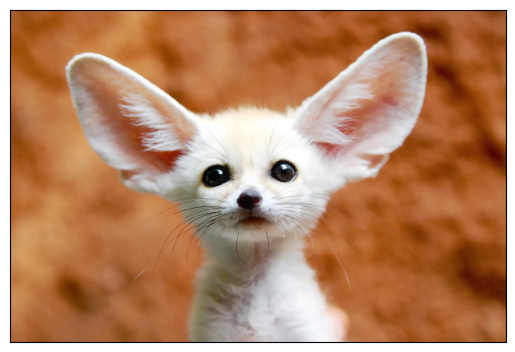

In [82]:
import matplotlib.image as mpimg
img = mpimg.imread('resources/animal.jpg')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
print("Congrats on finishing this lab!")
plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)